In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, AutoMinorLocator

warnings.filterwarnings("ignore", message="Workbook contains no default style")

FILE_PATH = 'C:\\Users\\vladi\\.vscode\\Git\\SM_25\\SM_25\\cursova\\'
RUN_TIME = 1440.0

In [42]:
def get_result(df):
    loader1_busy_time = df['Loader1_busyTime']
    loader2_busy_time = df['Loader2_busyTime']

    truck1_served = df["Truck1_served"]
    truck1_busy_time = df["Truck1_busyTime"]
    truck1_cooldownTime = df["Truck1_cooldownTime"]

    truck2_served = df["Truck2_served"]
    truck2_busy_time = df["Truck2_busyTime"]
    truck2_cooldownTime = df["Truck2_cooldownTime"]

    truck3_served = df["Truck3_served"]
    truck3_busy_time = df["Truck3_busyTime"]
    truck3_cooldownTime = df["Truck3_cooldownTime"]

    truck4_served = df["Truck4_served"]
    truck4_busy_time = df["Truck4_busyTime"]
    truck4_cooldownTime = df["Truck4_cooldownTime"]

    queue_served = df['Queue_served']
    queue_pair_avg_wt = df['Queue_pair_avg_wt']

    truck_served = truck1_served + truck2_served + truck3_served + truck4_served

    truck_utilization = (
        (loader1_busy_time + loader2_busy_time) + 
        (truck1_busy_time + truck2_busy_time + truck3_busy_time + truck4_busy_time) +
        (truck1_cooldownTime + truck2_cooldownTime + truck3_cooldownTime + truck4_cooldownTime)
    ) / RUN_TIME / 4

    productivity = truck_served / RUN_TIME
    processing_time = (
        (queue_pair_avg_wt * queue_served / 2) + 
        loader1_busy_time + 
        loader2_busy_time +
        truck1_busy_time +
        truck2_busy_time +
        truck3_busy_time +
        truck4_busy_time
    ) / truck_served


    df['Truck_served'] = truck_served
    df['Truck_utilization'] = truck_utilization
    df['Productivity'] = productivity
    df['ProcessingTime'] = processing_time

    df = df.groupby('test_mask').mean().reset_index()

    return df[[
        'total_time',
        'Producer1_served', 
        'Queue_served',
        'Queue_pair_avg_sz',
        'Queue_pair_avg_wt',
        'Con0_throughput',
        'Con0_availability',
        'Loader1_utilization',
        'Loader1_served',
        'Loader2_utilization',
        'Loader2_served',
        'Truck_served',
        'Truck_utilization',
        'Productivity',
        'ProcessingTime'
    ]].copy()
    

In [43]:
def get_verification():
    filename = 'verification'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")
    return get_result(df)

get_verification()

,total_time,Producer1_served,Queue_served,Queue_pair_avg_sz,Queue_pair_avg_wt,Con0_throughput,Con0_availability,Loader1_utilization,Loader1_served,Loader2_utilization,Loader2_served,Truck_served,Truck_utilization,Productivity,ProcessingTime
0,1440.0,179.958,144.130,8.939046,182.188862,20.069887,0.652982,0.470391,35.561,0.419696,35.840,69.977,0.723733,0.048595,228.682377
1,1440.0,360.425,146.514,52.998247,1050.337303,19.749288,0.627157,0.478837,36.295,0.429794,36.321,71.192,0.735324,0.049439,1122.053374
2,1440.0,180.243,163.576,4.456623,79.550989,17.654123,0.566354,0.337727,40.810,0.479542,40.425,79.631,0.773681,0.055299,119.166783
3,1440.0,179.794,159.700,5.257241,96.755054,18.099624,0.582319,0.523332,39.671,0.302106,39.599,77.726,0.761883,0.053976,137.366234
4,1440.0,179.772,156.434,6.125336,114.881833,18.476159,0.576703,0.403541,38.709,0.350723,38.806,75.947,0.785188,0.052741,159.441549
5,1440.0,180.217,152.078,7.229565,140.110026,19.025321,0.798355,0.495014,37.697,0.445251,37.633,74.489,0.621437,0.051728,172.573442
6,1440.0,179.756,145.570,8.494044,171.447513,19.874432,0.679997,0.475344,35.817,0.426445,36.277,70.823,0.707009,0.049183,215.272465
7,1440.0,179.776,150.970,7.498288,146.423100,19.169657,0.771777,0.494017,37.412,0.442035,37.371,73.351,0.639721,0.050938,191.711927


In [44]:
def get_trans_period():
    filename = 'trans'
    full_path = f"{FILE_PATH}{filename}.xlsx"
    df = pd.read_excel(full_path, engine="openpyxl")
    return get_result(df)

trans = get_trans_period()
trans

,total_time,Producer1_served,Queue_served,Queue_pair_avg_sz,Queue_pair_avg_wt,Con0_throughput,Con0_availability,Loader1_utilization,Loader1_served,Loader2_utilization,Loader2_served,Truck_served,Truck_utilization,Productivity,ProcessingTime
0,1440.0,179.998,143.838,9.109402,186.234382,20.118340,0.655828,0.470239,35.578,0.423254,35.671,69.921,0.722119,0.048556,232.755180
1,3440.0,180.304,145.732,32.981336,658.101730,19.855916,0.630770,0.483379,36.612,0.427506,36.234,72.825,0.748213,0.050573,699.170706
2,5440.0,179.445,145.842,56.436017,1122.072725,19.831229,0.628327,0.483133,36.521,0.427574,36.425,72.926,0.749630,0.050643,1162.779022
3,7440.0,180.000,145.382,80.528917,1605.572876,19.899305,0.631512,0.480682,36.424,0.431952,36.281,72.636,0.747103,0.050442,1647.828430
4,9440.0,179.518,145.760,103.475415,2057.855399,19.851970,0.629543,0.481052,36.370,0.431644,36.518,72.868,0.748523,0.050603,2099.037451


In [45]:
trans1 = trans.copy()
trans1['total_time'] = trans1['total_time'] - RUN_TIME

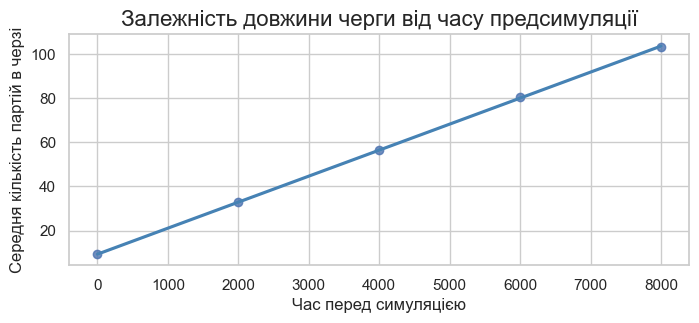

In [46]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans1,
    x='total_time',
    y='Queue_pair_avg_sz',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність довжини черги від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середня кількість партій в черзі', fontsize=12)

plt.show()

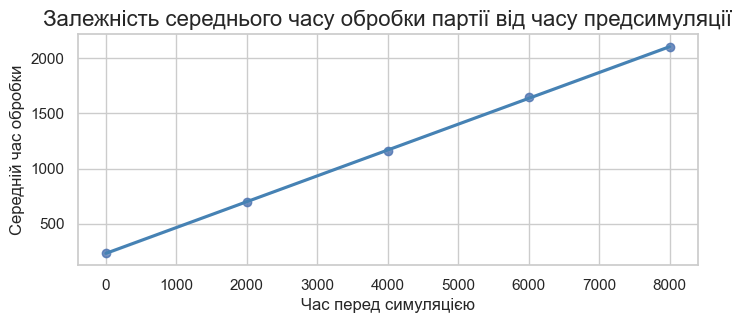

In [47]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans1,
    x='total_time',
    y='ProcessingTime',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність середнього часу обробки партії від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середній час обробки', fontsize=12)

plt.show()

Text(0, 0.5, 'Середня продуктивність')

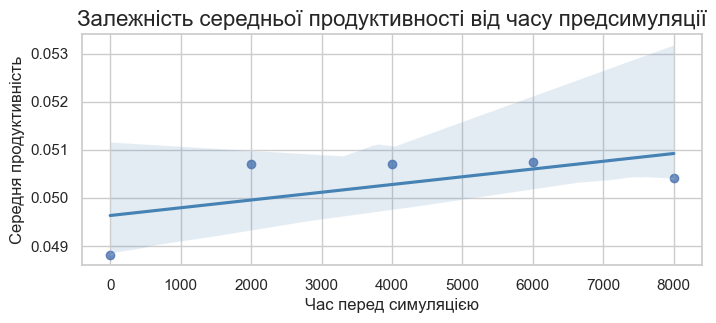

In [37]:
plt.figure(figsize=(8, 3)) 

sns.regplot(
    data=trans1,
    x='total_time',
    y='Productivity',
    scatter=True,
    line_kws={"color": "#4682b4"},
)

plt.title('Залежність середньої продуктивності від часу предсимуляції', fontsize=16)
plt.xlabel('Час перед симуляцією', fontsize=12)
plt.ylabel('Середня продуктивність', fontsize=12)